In [1]:
import cv2
import pytesseract

In [2]:
#read the image
image = cv2.imread('./car.jpg')

In [3]:
#Convert to GrayScale
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


In [4]:
#dectect edges
canny_edge = cv2.Canny(gray_img,170,200)

In [5]:
#find Contours based on edges
contours,new = cv2.findContours(canny_edge.copy(),cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [6]:
contours = sorted(contours,key=cv2.contourArea,reverse=True)[:30]

In [7]:
# Initialize license Plate contour and x,y coordinates
contour_with_license_plate = None
license_plate = None
x = None
y = None
w = None
h= None

In [8]:
for contour in contours:
    # find the perimeter and it should be a closed contour
    perimeter = cv2.arcLength(contour,True)
    approx = cv2.approxPolyDP(contour,0.01*perimeter,True)
    if len(approx)==4:
        contour_with_license_plate = approx
        x,y,w,h = cv2.boundingRect(approx)
        license_plate = gray_img[y:y+h,x:x+w]
        break
        

In [9]:
import matplotlib.pyplot as plt

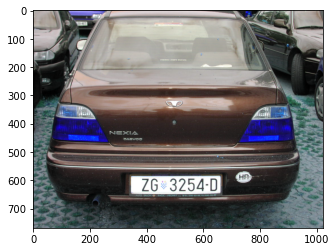

In [10]:
plt.imshow(image)

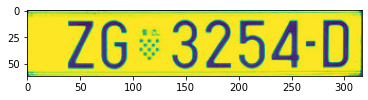

In [11]:
plt.imshow(license_plate)

In [12]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [13]:
# Removing Noise from the detected image, before sending to Tesseract
license_plate = cv2.bilateralFilter(license_plate, 11, 17, 17)
(thresh, license_plate) = cv2.threshold(license_plate, 150, 180, cv2.THRESH_BINARY)

In [14]:
#Text Recognition
text = pytesseract.image_to_string(license_plate)
#Draw License Plate and write the Text
image = cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 3) 
image = cv2.putText(image, text, (x-100,y-50), cv2.FONT_HERSHEY_SIMPLEX, 3, (0,255,0), 6, cv2.LINE_AA)

print("License Plate :", text)

License Plate : 


In [15]:
cv2.imshow("License Plate Detection",image)
cv2.waitKey(0)

-1